# EDA (Exploratory Data Analysis) 

Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación del conjunto de datos consolidado **'homicidios_cleaned.csv y lesiones_cleaned.csv'** (productos de la unión de 'HECHOS' y 'VICTIMAS' de los archivos homicidios.xlsx y lesiones.xlsx), procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

Durante el EDA, nos sumergimos en este conjunto de datos para comprender su estructura, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes. A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

## 1. Importar Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from functions import data_cleaning

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

## 2. Cargar Datos

En la etapa inicial de nuestro proceso, abordamos los archivos originales **'homicidios.xlsx' y 'lesiones.xlsx'**, cada uno compuesto por dos hojas de datos: HECHOS y VICTIMAS. Durante la fase de Extracción, Transformación y Carga (ETL), optamos por fusionar estas hojas mediante un merge, generando así dos archivos resultantes: **'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'**. Estos archivos han sido sometidos a un proceso exhaustivo de tratamiento y limpieza de datos.

Ahora, en esta fase de análisis exploratorio, se presenta la siguiente decisión estratégica. Consideraremos la opción de concatenar los archivos limpios **'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'**, uniendo así la información de homicidios y lesiones bajo un conjunto de datos unificado denominado **'siniestros_viales'**. Esta decisión se tomará tras una evaluación más profunda de los datos, permitiéndonos obtener una perspectiva integral de los incidentes viales y sus implicaciones.

In [2]:
# Cargar datasets

homicidios_df = pd.read_csv('homicidios_cleaned.csv')
lesiones_df = pd.read_csv('lesiones_cleaned.csv')

In [3]:
homicidios_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.47533969,-34.68757022,moto,auto,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.39040293,-34.63189362,moto,auto,masculino,30.0,fatal


In [4]:
lesiones_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,leve


## 3.Explorar Dataset

In [5]:
homicidios_df.shape

(717, 13)

In [6]:
lesiones_df.shape

(27599, 13)

In [7]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
sexo                  6    0.836820
edad                 53    7.391911
gravedad              0    0.000000


In [8]:
# Obtener el conteo de nulos por columna de lesiones_df
null_count = lesiones_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (lesiones_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


Estoy fundamentando el análisis en la identificación de datos nulos los cuales fueron tratados durante la fase de ETL. Aunque no se logró la imputación completa de todos los nulos, opté por no eliminar registros con el fin de evitar sesgar los resultados. Al observar los porcentajes obtenidos, destacamos:

**Análisis del DataFrame 'homicidios_df':**
- La columna 'franja_hora' tiene solo un valor nulo (0.14%), lo cual no es significativo.
- Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'sexo' y 'edad' tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

**Análisis del DataFrame 'lesionados_df':**
- Las columnas 'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'vehiculo_victima', 'vehiculo_acusado', todas tienen nulos pero para las tres últimas columnas mencionadas el porcentaje es considerable superando el 45%.


Dado que ambos dataframes tienen información significativa sobre las víctimas y las circunstancias de los siniestros, sería beneficioso concatenarlos verticalmente para tener una visión más completa. Sin embargo, las columnas 'tipo_calle', 'vehiculo_victima' y 'vehiculo_acusado' en función de su relevancia para los objetivos del análisis se abordarán sólo para los siniestros de gravedad fatal.

In [9]:
# Concatenar los dos DataFrames verticalmente 

siniestros = pd.concat([homicidios_df, lesiones_df], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 13)


In [10]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_siniestro      28316 non-null  object 
 1   nro_victimas      28316 non-null  int64  
 2   fecha             28316 non-null  object 
 3   franja_hora       28306 non-null  float64
 4   tipo_calle        15436 non-null  object 
 5   comuna            26691 non-null  float64
 6   longitud          26659 non-null  object 
 7   latitud           26659 non-null  object 
 8   vehiculo_victima  15484 non-null  object 
 9   vehiculo_acusado  10374 non-null  object 
 10  sexo              26082 non-null  object 
 11  edad              23792 non-null  float64
 12  gravedad          28316 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.8+ MB


In [11]:
# Convertir a entero

columns_to_int = [ 'nro_victimas']

In [12]:
# Convertir fecha

columns_to_convert = ['fecha']

In [13]:
# Categorización de columnas

columns_to_categorize = ['franja_hora', 'tipo_calle', 'comuna', 'vehiculo_victima', 
                         'vehiculo_acusado', 'sexo', 'edad', 'gravedad']

In [14]:
# Invocamos la función 'data_cleaning' para que haga el proceso de transformación de los datos 

siniestros_df = data_cleaning(siniestros,
                              convert_to_int_columns=columns_to_int, #Conversión entero
                              convert_to_datetime=columns_to_convert, #COnversión fecha
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

La categorización de ciertas columnas en un conjunto de datos tiene varios beneficios en el proceso de análisis de datos. A continuación, se justifica la categorización de las columnas que seleccionamos:

`franja_hora`: Categorizar la franja horaria puede ayudar a agrupar y analizar patrones en diferentes momentos del día, como las horas pico o las horas de menor incidencia. Facilita la identificación de tendencias temporales en la ocurrencia de siniestros viales.

`tipo_calle`: La categorización del tipo de calle permite analizar la relación entre el tipo de vía y la frecuencia de siniestros. Puede revelar si ciertos tipos de calles están asociados con una mayor incidencia de incidentes viales.

`comuna`: Categorizar las comunas puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con tasas de siniestralidad distintas. Ayuda a entender la distribución espacial de los incidentes en la ciudad.

`vehiculo_victima y vehiculo_acusado`: Categorizar los tipos de vehículos involucrados proporciona una visión más clara de los escenarios de siniestros. Permite identificar si ciertos tipos de vehículos están más propensos a estar involucrados en accidentes y si hay patrones específicos de interacción entre vehículos.

`sexo`: La categorización del sexo facilita el análisis de la distribución de siniestros entre géneros. Puede ayudar a identificar si hay disparidades significativas en la frecuencia de incidentes viales entre diferentes grupos de género.

`edad`: Categorizar la edad puede agrupar a las personas en rangos etarios, lo que simplifica el análisis demográfico. Permite identificar si ciertos grupos de edad están más afectados por los siniestros y si hay tendencias específicas en grupos de población.

`gravedad`: La categorización de la gravedad permite clasificar los incidentes en diferentes niveles de seriedad. Facilita el análisis de la distribución de la gravedad de los siniestros y la identificación de patrones relacionados con lesiones o daños más severos.

In [17]:
siniestros.describe()

,nro_victimas,franja_hora,comuna,edad
count,28316.000000,28306.000000,26691.000000,23792.000000
mean,1.413300,13.495831,7.929527,37.849445
std,1.076291,5.635586,4.545744,15.379509
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,4.000000,27.000000
50%,1.000000,14.000000,8.000000,35.000000
75%,1.000000,18.000000,12.000000,46.000000
max,16.000000,23.000000,15.000000,100.000000


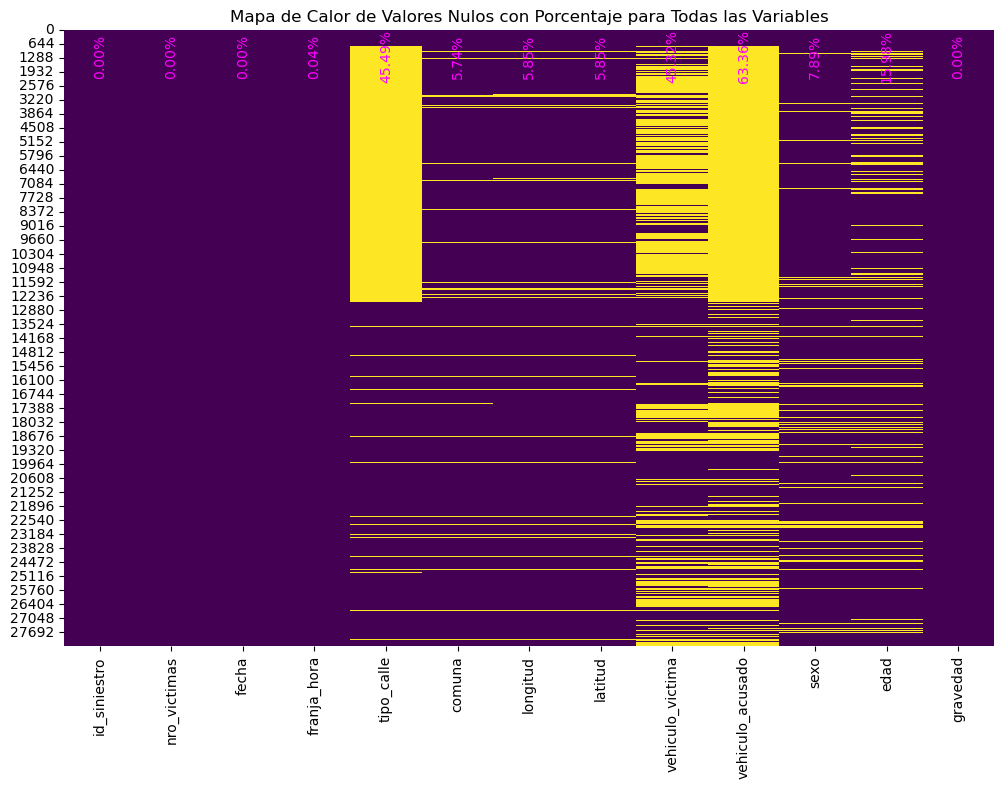

In [16]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = siniestros.isnull().mean() * 100

# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(12, 8))
sns.heatmap(siniestros.isnull(), cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(siniestros.columns.get_loc(col) + 0.5, 1200, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='fuchsia')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()


**Análisis Descriptivo del Dataframe 'siniestros'**

El conjunto de datos proporcionado contiene información detallada sobre 717 siniestros viales en la Ciudad Autónoma de Buenos Aires. A continuación, se presenta un análisis descriptivo para entender la naturaleza y características de los incidentes.

In [ ]:
Tratar Duplicados

In [ ]:
Identifica y elimina duplicados si existen en cualquiera de los conjuntos de datos.

In [ ]:
# Tratar duplicados
hechos_df.drop_duplicates(inplace=True)
victimas_df.drop_duplicates(inplace=True)
lesiones_df.drop_duplicates(inplace=True)

In [ ]:
Manejar Valores Faltantes

In [ ]:
Analiza la presencia de valores nulos y toma decisiones sobre cómo manejarlos.

In [ ]:
# Verificar valores nulos
print("Hechos DF - Nulos:")
print(hechos_df.isnull().sum())

print("Víctimas DF - Nulos:")
print(victimas_df.isnull().sum())

print("Lesiones DF - Nulos:")
print(lesiones_df.isnull().sum())


In [ ]:
Análisis de Outliers

In [ ]:
Utiliza gráficos como boxplot o scatterplot para identificar posibles outliers en columnas numéricas.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de outliers
sns.boxplot(x=hechos_df["EDAD"])
plt.title("Boxplot de Edades en Hechos")
plt.show()


In [ ]:
Visualización de Datos

In [ ]:
Crea gráficos relevantes para el análisis (histogramas, gráficos de barras, etc.) para comprender mejor la distribución de los datos.

In [ ]:
# Histograma de Edades en Hechos
plt.hist(hechos_df["EDAD"], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Edades en Hechos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


**EN LA COLUMNA ID, se visualiza que hay saltos en la numeracion**

**EN EL ARCHIVO LESIONES solo tenemos información de los años 2019 al 2021.
MIENTRAS QUE EN HOMICIDIOS, tenemos desde 2016 al 2021**


In [ ]:
Conclusiones y Documentación:

In [ ]:
Añade celdas de Markdown para documentar tus análisis, decisiones y conclusiones. Justifica cualquier acción tomada.

In [ ]:
## Conclusiones EDA:

- Se identificaron y eliminaron duplicados en los conjuntos de datos.
- Se realizó un análisis de valores nulos y se tomaron decisiones sobre cómo manejarlos.
- Se visualizaron gráficos de outliers y distribuciones para entender mejor la naturaleza de los datos.
- ...



In [ ]:
import seaborn as sns; sns.pairplot(df)